# Chapter 11: Time Series

# 11.1 Date and Time Data Types and Tools

In [71]:
from datetime import datetime, timedelta
from dateutil.parser import parse
import numpy as np
import pandas as pd
import pytz

In [22]:
# Native python time/data tools
print(datetime.now())
b = datetime(1992, 10, 2, 5, 0, 1, 1234)
print(b)
print((datetime.now() - b).days)
print(b + timedelta(12)*2)

2022-12-06 16:15:15.399989
1992-10-02 05:00:01.001234
11022
1992-10-26 05:00:01.001234


In [28]:
# Can do ISO C89 compatible string conversions
print(b.strftime('%Y-%m-%d'))
# Can also be used for reading dates
print(datetime.strptime('09 02 2002', '%m %d %Y'))
# but dateutils.parser.parse is better
print(parse('September 10 2002'))

1992-10-02
2002-09-02 00:00:00


datetime.datetime(2002, 9, 10, 0, 0)

## 10.2 Time Series Basics

In [45]:
# Time series can be constructed by passing list of datetimes as index to series, or
# more quickly as below
s = pd.Series(np.random.randn(1000),
             index=pd.date_range('10/1/1992',
                                 periods=1000))
print(s)
print()
# Can easily slide
print(s['1993'])
print()
print(s['March 1994'])
print()
print(s[datetime(1992, 11, 1): 'March 1994'])


1992-10-01   -0.155056
1992-10-02   -0.061714
1992-10-03   -0.511708
1992-10-04    1.011177
1992-10-05   -0.391044
                ...   
1995-06-23   -0.539008
1995-06-24   -1.385562
1995-06-25    1.041692
1995-06-26   -0.522020
1995-06-27    0.276458
Freq: D, Length: 1000, dtype: float64

1993-01-01   -0.602838
1993-01-02   -0.135940
1993-01-03    0.299766
1993-01-04   -0.618960
1993-01-05   -0.962574
                ...   
1993-12-27    0.506190
1993-12-28    0.742606
1993-12-29    0.420253
1993-12-30   -0.130540
1993-12-31    0.699325
Freq: D, Length: 365, dtype: float64

1994-03-01    0.329772
1994-03-02   -1.377139
1994-03-03    0.524515
1994-03-04   -0.143101
1994-03-05    1.056286
1994-03-06   -1.241817
1994-03-07   -1.463785
1994-03-08    0.944879
1994-03-09    0.755888
1994-03-10    0.354757
1994-03-11   -0.089176
1994-03-12   -0.707863
1994-03-13    1.097646
1994-03-14   -0.770802
1994-03-15   -0.288287
1994-03-16    0.225187
1994-03-17    0.788429
1994-03-18    0.403639
199

In [54]:
# Same for df
dates = pd.date_range('10/02/1992', periods=10, freq='W-FRI')
vals = np.random.randn(10, 4)
pd.DataFrame(vals, index=dates, columns=list('abcd'))

,a,b,c,d
1992-10-02,0.772516,0.001946,1.060899,-1.495450
1992-10-09,-0.116284,0.924735,0.633157,0.311830
1992-10-16,0.851401,-1.722438,-0.419226,0.813189
1992-10-23,0.773459,0.553777,-0.779648,0.151540
1992-10-30,-0.037106,0.130496,1.192541,-0.733702
1992-11-06,1.524919,-1.309674,-0.172023,-0.418439
1992-11-13,-0.492225,-0.231217,-0.545799,0.262841
1992-11-20,-0.130564,1.330242,0.592939,1.098672
1992-11-27,0.573726,1.601932,0.554939,0.654082
1992-12-04,-0.807681,-0.226807,-0.485716,0.476956


## 11.3 Date Ranges, Frequencies, Shifting 

In [60]:
# Wide variety of options for specifying frequency
r = pd.date_range('12/01/2022',
                  datetime.now(),
                  freq='4h30min')
r

DatetimeIndex(['2022-12-01 00:00:00', '2022-12-01 04:30:00',
               '2022-12-01 09:00:00', '2022-12-01 13:30:00',
               '2022-12-01 18:00:00', '2022-12-01 22:30:00',
               '2022-12-02 03:00:00', '2022-12-02 07:30:00',
               '2022-12-02 12:00:00', '2022-12-02 16:30:00',
               '2022-12-02 21:00:00', '2022-12-03 01:30:00',
               '2022-12-03 06:00:00', '2022-12-03 10:30:00',
               '2022-12-03 15:00:00', '2022-12-03 19:30:00',
               '2022-12-04 00:00:00', '2022-12-04 04:30:00',
               '2022-12-04 09:00:00', '2022-12-04 13:30:00',
               '2022-12-04 18:00:00', '2022-12-04 22:30:00',
               '2022-12-05 03:00:00', '2022-12-05 07:30:00',
               '2022-12-05 12:00:00', '2022-12-05 16:30:00',
               '2022-12-05 21:00:00', '2022-12-06 01:30:00',
               '2022-12-06 06:00:00', '2022-12-06 10:30:00',
               '2022-12-06 15:00:00'],
              dtype='datetime64[ns]', freq='27

In [69]:
# Shift data with .shift()
ts = pd.Series(np.random.randn(10),
               index=pd.date_range('10/02/1992',
                                  periods=10,
                                  freq='B'))
print(ts.shift(1))

# Percent change
print(ts / ts.shift(1) - 1 * 100)
print()

# Specify the shift frequency to avoid NaN
print(ts.shift(3, freq='D'))

1992-10-02         NaN
1992-10-05    1.611094
1992-10-06    1.036899
1992-10-07    0.915954
1992-10-08   -0.767250
1992-10-09    0.293552
1992-10-12    0.489766
1992-10-13   -0.171742
1992-10-14    0.905699
1992-10-15   -0.548888
Freq: B, dtype: float64
1992-10-02           NaN
1992-10-05    -99.356401
1992-10-06    -99.116641
1992-10-07   -100.837651
1992-10-08   -100.382603
1992-10-09    -98.331586
1992-10-12   -100.350661
1992-10-13   -105.273614
1992-10-14   -100.606037
1992-10-15   -101.388863
Freq: B, dtype: float64

1992-10-05    1.611094
1992-10-08    1.036899
1992-10-09    0.915954
1992-10-10   -0.767250
1992-10-11    0.293552
1992-10-12    0.489766
1992-10-15   -0.171742
1992-10-16    0.905699
1992-10-17   -0.548888
1992-10-18    0.762330
dtype: float64


## 11.4 Time Zone Handling

In [79]:
# timezone handling done with the package pytz
print(pytz.all_timezones[::40])
print()
print(pytz.timezone('Asia/Tokyo'))
# Can localize, convert, etc
# Series by default have no tz but you can assign with .tz_localize('utc')

# Adding two time series with differnt 

['Africa/Abidjan', 'Africa/Mbabane', 'America/Belize', 'America/Guatemala', 'America/Mexico_City', 'America/Shiprock', 'Asia/Ashgabat', 'Asia/Katmandu', 'Asia/Tokyo', 'Australia/Perth', 'Etc/GMT+6', 'Europe/Gibraltar', 'Europe/Vaduz', 'Mexico/BajaSur', 'Pacific/Port_Moresby']

Asia/Tokyo


## 11.5 Periods and Period Arithmetic

In [135]:
# Period represents a unit of time
p = pd.Period('April 2011', freq='M')
print(p+4)
# or can represent a year with freq
y = pd.Period('2008', freq='A-NOV') # ending in november
print(y+5)

pd.Period(2011, freq='A-NOV') - y

2011-08
2013


<3 * YearEnds: month=11>

In [143]:
# Can convert timestamps to periods

rng = pd.date_range('10/02/1992', periods=6, freq='D')
tms = pd.Series(np.random.randn(len(rng)), index=rng)
pts = tms.to_period('M')
print(tms, pts)
# And back
print(pts.to_timestamp(how='end'))

1992-10-02   -0.339088
1992-10-03    0.262802
1992-10-04   -2.499147
1992-10-05    0.446933
1992-10-06    0.523183
1992-10-07    0.860770
Freq: D, dtype: float64 1992-10   -0.339088
1992-10    0.262802
1992-10   -2.499147
1992-10    0.446933
1992-10    0.523183
1992-10    0.860770
Freq: M, dtype: float64
1992-10-31 23:59:59.999999999   -0.339088
1992-10-31 23:59:59.999999999    0.262802
1992-10-31 23:59:59.999999999   -2.499147
1992-10-31 23:59:59.999999999    0.446933
1992-10-31 23:59:59.999999999    0.523183
1992-10-31 23:59:59.999999999    0.860770
dtype: float64


In [151]:
# Can concate multiple date columns into PeriodIndex
macro = pd.read_html('https://github.com/wesm/pydata-book/blob/3rd-edition/examples/macrodata.csv')[0]


In [152]:
macro = macro.iloc[:,1:] # Get rid of first column
index = pd.PeriodIndex(year=macro.year, quarter=macro.quarter,
                      freq='Q-DEC')

In [155]:
macro.index = index
macro

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959Q1,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1959Q2,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
1959Q3,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
1959Q4,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
1960Q1,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008Q3,2008,3,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
2008Q4,2008,4,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
2009Q1,2009,1,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
2009Q2,2009,2,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


## 11.6 Resampling and Frequency Conversion

In [162]:
# Converting a time series of one frequency to another, similar to groupby
ts = pd.Series(np.random.randn(100), index=pd.date_range("1992-01-01",
                                                        periods=100,
                                                        freq='D'))
print(ts.resample('W').mean())


1992-01-05   -0.302886
1992-01-12    0.338548
1992-01-19    0.631736
1992-01-26    0.446857
1992-02-02    0.356728
1992-02-09    0.015742
1992-02-16   -0.164320
1992-02-23   -0.064207
1992-03-01   -0.215839
1992-03-08   -0.058955
1992-03-15    0.117641
1992-03-22   -0.492122
1992-03-29   -0.274081
1992-04-05   -0.701719
1992-04-12   -0.065658
Freq: W-SUN, dtype: float64


In [168]:
# left v right
ts2 = pd.Series(np.random.randn(12),
               index=pd.date_range(datetime.now(),
                                   periods=12,
                                   freq='min'
                                  )
               )
ts2.resample('5min',
             closed='left', # lower bound inclusive
             label='right').mean() # upper bound as label
# .ohlc computer values for first, last, max, min
ts2.resample('5min').ohlc()

,open,high,low,close
2022-12-07 12:15:00,-0.476994,-0.476994,-0.476994,-0.476994
2022-12-07 12:20:00,-1.413479,-0.122372,-1.413479,-1.147927
2022-12-07 12:25:00,-0.712655,0.422865,-1.750800,0.422865
2022-12-07 12:30:00,0.050801,0.050801,0.050801,0.050801


## 11.7 Moving Window Functions

In [180]:
storks = pd.read_html('https://github.com/wesm/pydata-book/blob/3rd-edition/examples/stock_px.csv',
                     index_col=1,
                     parse_dates=True,
                     )[0].dropna(axis=1)
storks

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93
...,...,...,...,...
2011-10-10,388.81,26.94,76.28,1194.89
2011-10-11,400.29,27.00,76.27,1195.54
2011-10-12,402.19,26.96,77.16,1207.25
2011-10-13,408.43,27.18,76.37,1203.66


<AxesSubplot: >

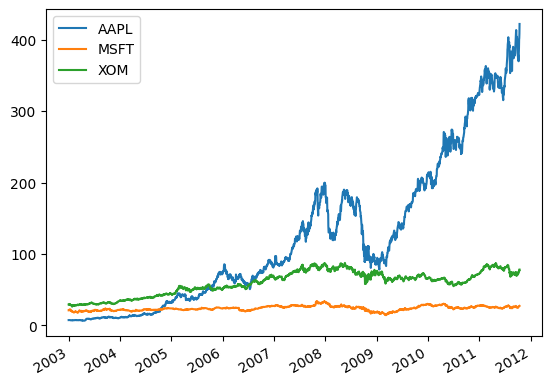

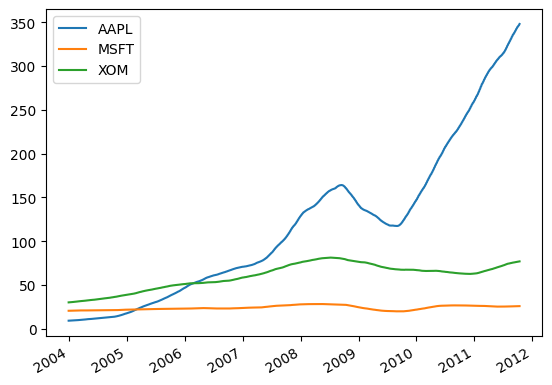

In [187]:
# Smooth with rolling
storks.iloc[:,:3].plot()
storks.iloc[:,:3].rolling(250).mean().plot()

<AxesSubplot: >

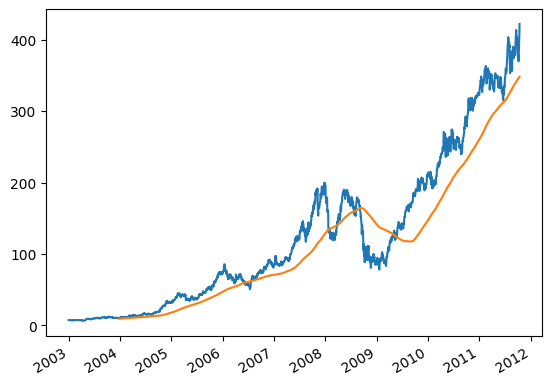

In [199]:
storks.AAPL.plot()
storks.AAPL.rolling(250).mean().plot() # Note the missing at the beginning

In [200]:
# Rolling can also take sting time designations for unevenly spaced data
storks.AAPL.rolling('20D').mean() # 20D for twenty days

2003-01-02      7.400000
2003-01-03      7.425000
2003-01-06      7.433333
2003-01-07      7.432500
2003-01-08      7.402000
                 ...    
2011-10-10    389.351429
2011-10-11    388.505000
2011-10-12    388.531429
2011-10-13    388.826429
2011-10-14    391.038000
Name: AAPL, Length: 2214, dtype: float64

In [202]:
# Correlations
spx_rets = storks.SPX.pct_change()
all_rets = storks.iloc[:,:3].pct_change()

<AxesSubplot: >

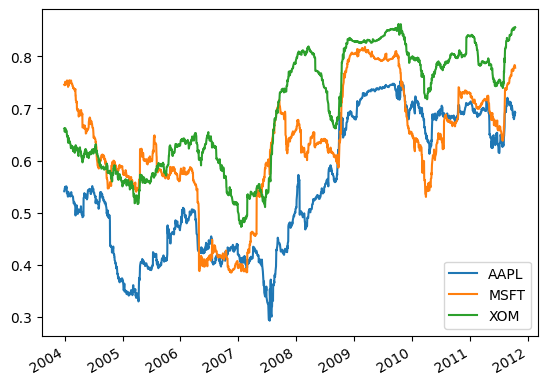

In [211]:
all_rets.rolling(250).corr(spx_rets).plot()